In [1]:
import av
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
import trackpy 
import trackpy as tp
from pims import ImageSequence
from Particledrop import Landing_Flashes

In [2]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [3]:
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
# video = r'C:\Users\brugg\Documents\MasterThesis\02062022\normal.avi'
video = r"E:\Ingmar\Ingmar\Experimental_data\16092022\1_stuck.avi"

In [17]:
container = av.open(video)

for frame in container.decode(video=0):
    frame.to_image().save('Images/1609_100nm_1_20000_stuck/frame%d.jpg' % frame.index)
    frame.to_image()

In [5]:
images = ImageSequence('Images/1609_100nm_1_20000_stuck/frame*.jpg')
length = len(images)
print(length)

1051


In [48]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


frames1 = gray(pims.open('Images/parafilm_2/*.jpg'))
# frames2 = gray(pims.open('FramesOverview2/*.jpg'))

In [7]:
frames1
nf1 = len(frames1)

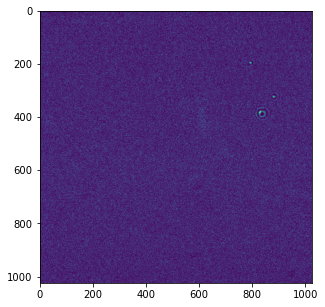

In [8]:
plt.imshow(frames1[450])

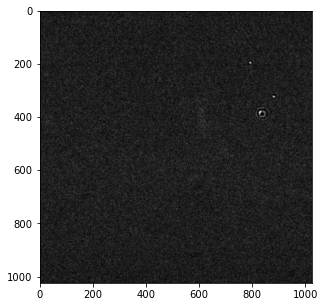

In [9]:
ab = tp.preprocessing.lowpass(frames1[450])
plt.imshow(ab, cmap='gray')

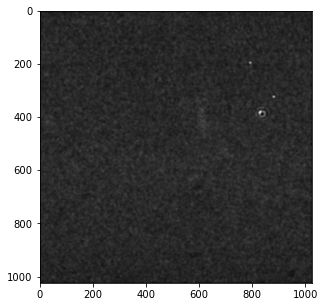

In [10]:
ba = tp.preprocessing.lowpass(frames1[450], sigma=3, truncate=4)
plt.imshow(ba, cmap='gray')

In [11]:
# frames2
# nf2 = len(frames2)

In [12]:
tp.find.percentile_threshold(frames1[450], percentile=65)

43.0

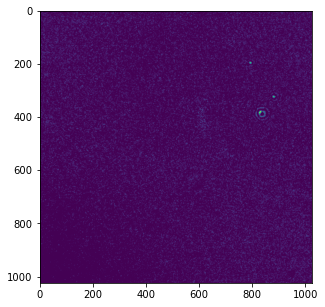

In [13]:
bpimage = tp.preprocessing.bandpass(frames1[450], lshort=1, llong=1001)
plt.imshow(bpimage)

In [15]:
f = tp.locate(bpimage, 5, minmass=36)

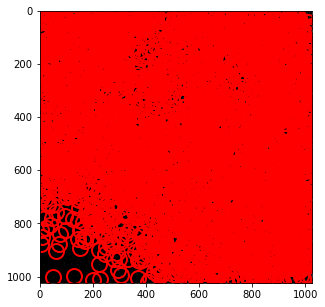

<AxesSubplot:>

In [16]:
tp.annotate(f, bpimage)

In [38]:
# frames1[525]

In [39]:
# overview1 = tp.locate(frames1[525], 7, minmass=700, separation=15)

In [40]:
# overview1

In [41]:
# tp.annotate(overview1, frames1[525]);
# print(len(overview1['mass']))

In [42]:
# fig, ax = plt.subplots()
# ax.hist(overview1['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [43]:
# frames2[366]

In [44]:
# overview2 = tp.locate(frames2[366], 7, minmass=700, separation=15)

In [45]:
# overview2

In [46]:
# tp.annotate(overview2, frames2[366]);
# print(len(overview2['mass']))

In [47]:
plt.rcParams['figure.figsize'] = (10, 10)

In [48]:
# fig, ax = plt.subplots()
# ax.hist(overview2['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [49]:
# f = tp.batch(frames[0:50], 5, minmass=56)
# f = tp.batch(frames1[20:29], 7, minmass=700, maxsize=2.2, noise_size=1.2, separation=15)

In [50]:
# tp.quiet()  # Turn off progress reports for best performance
# t = tp.link(f, 8, memory=1, )

In [51]:
# t1 = tp.filter_stubs(t, 25)
# # Compare the number of particles in the unfiltered and filtered data.
# print('Before:', t['particle'].nunique())
# print('After:', t1['particle'].nunique())

In [52]:
# plt.figure()
# tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [53]:
# t2 = t1[((t1['mass'] > 750) & (t1['size'] < 2.6) &
#          (t1['ecc'] < 0.5))]

In [54]:
# plt.figure()
# tp.annotate(t2[t2['frame'] == 366], frames2[366]);

In [55]:
# plt.figure()
# tp.plot_traj(t2);

In [56]:
startframe = 0
endframe = nf1
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = frames1[startframe2:endframe2] - np.mean([frames1[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

(1400, 1024, 1024)


Frame 1399: 10474 features


(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

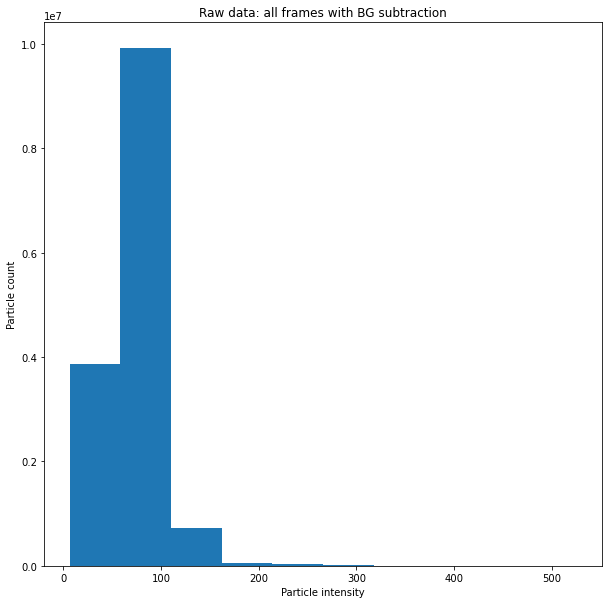

In [57]:
# t = tp.batch(bgcorrected2[:], 5, minmass=100, separation=15)
t = tp.batch(bgcorrected2[:], 5)
plt.title('Raw data: all frames with BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t['mass'])

(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

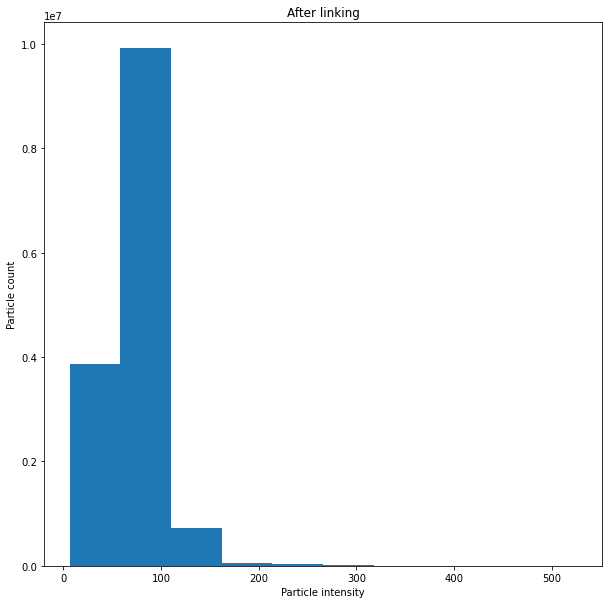

In [58]:
tp.quiet()  # Turn off progress reports for best performance
t1 = tp.link(t, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t1['mass'])

(array([4.511190e+05, 1.069432e+06, 1.009160e+05, 1.667300e+04,
        8.942000e+03, 5.858000e+03, 3.230000e+03, 2.224000e+03,
        8.560000e+02, 1.040000e+02]),
 array([  7.85291762,  59.63936516, 111.42581271, 163.21226025,
        214.9987078 , 266.78515534, 318.57160288, 370.35805043,
        422.14449797, 473.93094552, 525.71739306]),
 <BarContainer object of 10 artists>)

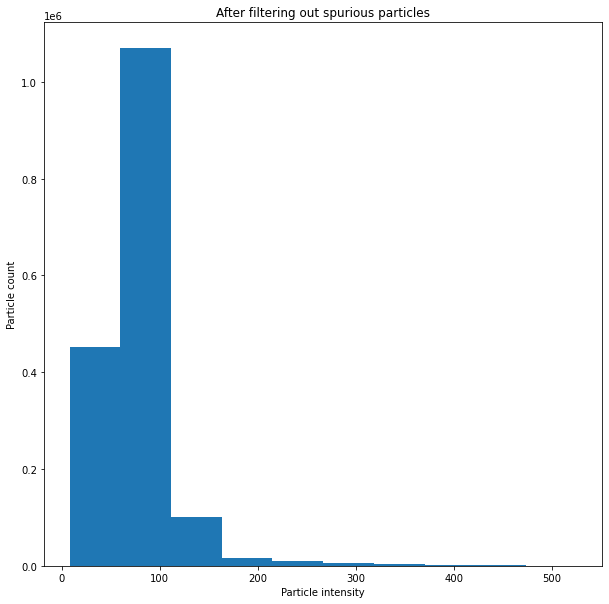

In [59]:
t2 = tp.filter_stubs(t1, 15)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t2['mass'])

(array([6235., 5013., 4062., 2778., 1921., 1633., 1174.,  554.,  191.,
          21.]),
 array([200.00149893, 232.57308835, 265.14467776, 297.71626717,
        330.28785658, 362.859446  , 395.43103541, 428.00262482,
        460.57421424, 493.14580365, 525.71739306]),
 <BarContainer object of 10 artists>)

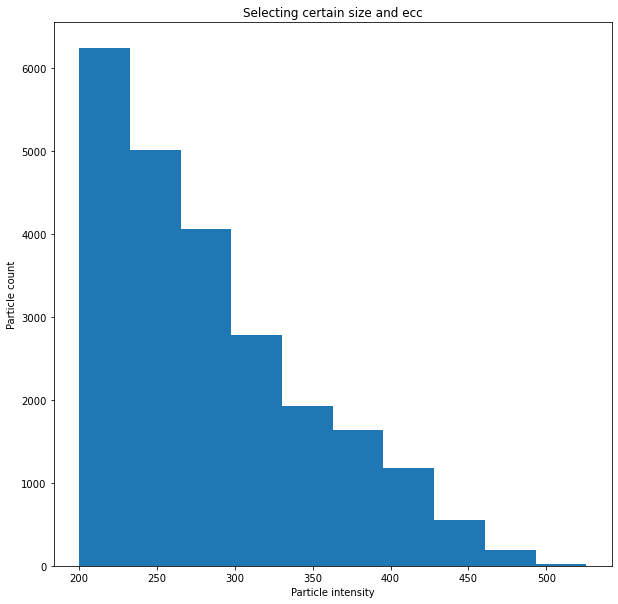

In [60]:
t3 = t2[((t2['mass'] > 200) & (t2['size'] < 2.6) &
         (t2['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t3['mass'])

Change to other frames sequence

(array([8.29580e+04, 5.73367e+05, 9.15680e+04, 1.85660e+04, 1.35160e+04,
        7.28100e+03, 3.19200e+03, 2.20200e+03, 9.48000e+02, 9.80000e+01]),
 array([ 38.18799275,  87.09097663, 135.9939605 , 184.89694437,
        233.79992825, 282.70291212, 331.60589599, 380.50887986,
        429.41186374, 478.31484761, 527.21783148]),
 <BarContainer object of 10 artists>)

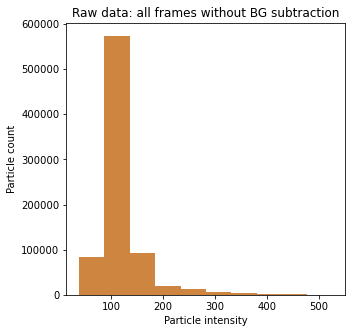

In [49]:
# t_a = tp.batch(frames1[:], 5, minmass=100, separation=15)
t_a = tp.batch(frames1[:], 5, separation=25)

plt.title('Raw data: all frames without BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_a['mass'], color='peru')

(array([8.29580e+04, 5.73367e+05, 9.15680e+04, 1.85660e+04, 1.35160e+04,
        7.28100e+03, 3.19200e+03, 2.20200e+03, 9.48000e+02, 9.80000e+01]),
 array([ 38.18799275,  87.09097663, 135.9939605 , 184.89694437,
        233.79992825, 282.70291212, 331.60589599, 380.50887986,
        429.41186374, 478.31484761, 527.21783148]),
 <BarContainer object of 10 artists>)

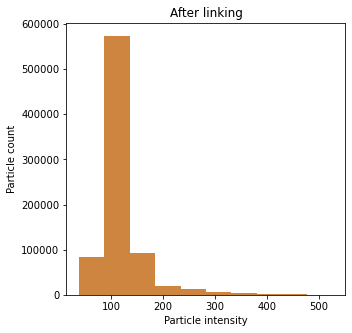

In [50]:
tp.quiet()  # Turn off progress reports for best performance
t_b = tp.link(t_a, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_b['mass'], color='peru')

(array([  3.,  22.,  32.,  61.,  79., 159., 207., 236., 288., 361., 461.,
        523., 609., 605., 524., 514., 475., 484., 550., 507., 551., 519.,
        476., 361., 276., 189.,  97.,  41.,  11.,   1.]),
 array([ 93.44749333, 107.9065046 , 122.36551588, 136.82452715,
        151.28353842, 165.74254969, 180.20156096, 194.66057223,
        209.11958351, 223.57859478, 238.03760605, 252.49661732,
        266.95562859, 281.41463986, 295.87365114, 310.33266241,
        324.79167368, 339.25068495, 353.70969622, 368.1687075 ,
        382.62771877, 397.08673004, 411.54574131, 426.00475258,
        440.46376385, 454.92277513, 469.3817864 , 483.84079767,
        498.29980894, 512.75882021, 527.21783148]),
 <BarContainer object of 30 artists>)

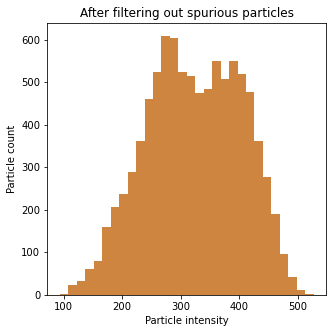

In [53]:
# t_c = tp.filter_stubs(t_b, 10)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_c['mass'], color='peru', bins=30)

(array([ 42.,  81., 188., 279., 345., 513., 661., 847., 800., 725., 650.,
        722., 736., 753., 668., 503., 302., 147.,  36.,   4.]),
 array([120.70443088, 141.03010091, 161.35577094, 181.68144097,
        202.007111  , 222.33278103, 242.65845106, 262.98412109,
        283.30979112, 303.63546115, 323.96113118, 344.28680121,
        364.61247124, 384.93814127, 405.2638113 , 425.58948133,
        445.91515136, 466.24082139, 486.56649142, 506.89216145,
        527.21783148]),
 <BarContainer object of 20 artists>)

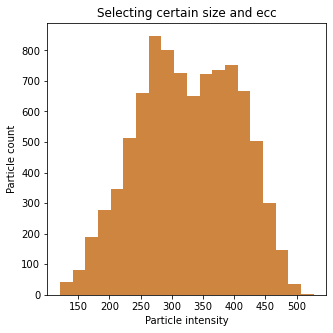

In [52]:
t_d = t_c[((t_c['mass'] > 120) & (t_c['size'] < 2.6) &
         (t_c['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_d['mass'], color='peru', bins=20)